<a href="https://colab.research.google.com/github/ealsk/Undergrad-DeepLearning-20Fall/blob/master/r_sqaured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

**MSE (Mean Squared Error)**

In [5]:
x=[[1],[2],[3],[4],[5]]
y=[[1],[5],[6],[7],[11]]
y=np.array(y)
x=np.array(x)
mean=(1+5+6+7+11)/5
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


Text(0, 0.5, 'Y')

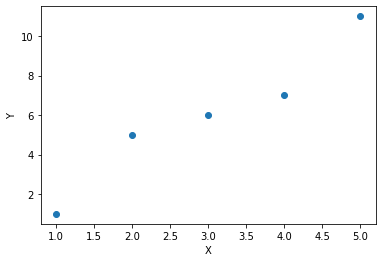

In [6]:
plt.plot(x,y,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [7]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

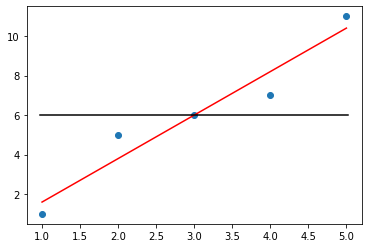

In [9]:
plt.plot(x,y,marker='o',linestyle='')
plt.plot(x,lr.predict(x), color='red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [10]:
mean_squared_error(y, lr.predict(x))

0.7200000000000001

In [11]:
print(lr.predict(x))

[[ 1.6]
 [ 3.8]
 [ 6. ]
 [ 8.2]
 [10.4]]


In [12]:
def myMSE(X, Y, line):
  err=0

  if(str(type(line)) == "<class 'float'>"):
    for i in range(len(X)):
        err +=(Y[i][0]-line)**2
  else:
    for i in range(len(X)):
        err +=(Y[i][0]-line[i][0])**2

  MSE = err/len(X)
  return MSE

In [13]:
print("MSE: ", myMSE(x,y,lr.predict(x)))

MSE:  0.7200000000000001


**R squared**

In [14]:
lr.score(x,y)

0.9307692307692308

In [16]:
def myRsq(X,Y,model):
  hap =0
  for i in range(len(X)):
    hap += Y[i][0]
  mean = float(hap/len(X))
  print("평균: ", mean)

  model.fit(X,Y)

  reg_mse=myMSE(X,Y,model.predict(X))
  avg_mse=myMSE(X,Y,mean)
  r= 1-(reg_mse/avg_mse)

  print("R-squared :", r)

In [18]:
myRsq(x,y,LinearRegression())

평균:  6.0
R-squared : 0.9307692307692308


**100개 데이터로 해보기**


**데이터가 선형모델에 적합한 경우**

In [19]:
data=100

In [24]:
x_train=[]
for i in range(1,data+1):
  x_train.append([i])

x_train=np.array(x_train)
x_train.shape

(100, 1)

In [26]:
y_train1=[]
for i in range(1,data+1): 
  y_train1.append([i+random.uniform(-20,20)])
                  
y_train1=np.array(y_train1)
y_train1.shape

(100, 1)

Text(0, 0.5, 'V')

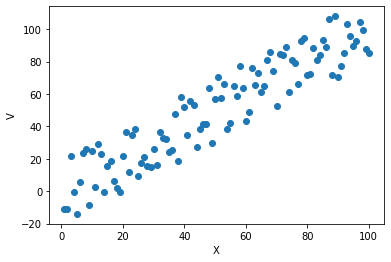

In [27]:
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('V')

**2.모델에 넣기**

In [28]:
lr.fit(x_train,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
mean=0
for i in y_train1:
    for j in i:
        mean+=j
mean=mean/data
print(mean)

50.36371576074716


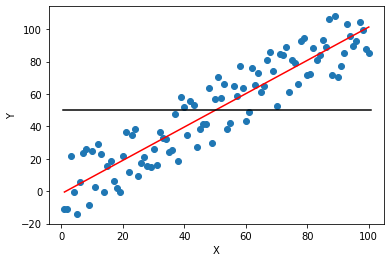

In [30]:
plt.plot(x_train, y_train1, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [31]:
lr.score(x_train, y_train1)

0.8581530772302185

In [32]:
myRsq(x_train, y_train1, LinearRegression())

평균:  50.36371576074716
R-squared : 0.8581530772302185


**데이터가 선형모델에 부적합한 경우**

In [33]:
y_train2=[]
for i in range(1, data+1):
  y_train2.append([i+random.uniform(-400,400)])

y_train2=np.array(y_train2)
y_train2.shape

(100, 1)

Text(0, 0.5, 'Y')

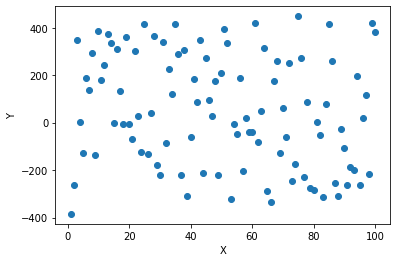

In [34]:
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [35]:
mean=0
for i in y_train2:
  for j in i:
      mean+=j
mean=mean/data
print(mean)

49.78095778116982


In [36]:
lr.fit(x_train, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

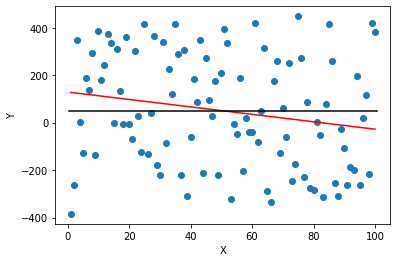

In [39]:
plt.plot(x_train, y_train2, marker='o', linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train, lr.predict(x_train),color='red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color='black')

In [40]:
lr.score(x_train, y_train2)

0.03733280168439446

In [41]:
myRsq(x_train, y_train2, LinearRegression())

평균:  49.78095778116982
R-squared : 0.0373328016843939
